In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math

In [197]:
file = 'problem_statement.xlsx'
xl = pd.ExcelFile(file)

In [198]:
print(xl.sheet_names)

['Problem Statement', 'Data', 'Data Dictionary', 'Sheet2']


In [199]:
train = xl.parse('Data')
data_dictionary = xl.parse('Data Dictionary')

In [200]:
train.head()

,aco_num,aco_name,qualscore,qualperfshare,n_ab,n_ben_age_0_64,n_ben_age_65_74,n_ben_age_75_84,n_ben_age_85plus,n_ben_female,...,aco42,aco40,dm_comp,aco27,aco41,aco28,aco30,aco44,aco43,aco12
0,A67373,"Palm Beach Accountable Care Organization, LLC",1.0,0.5,36268,3178,11716,10013,5897,17789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A38665,"Chinese Community Accountable Care Organization, Inc.",1.0,0.5,13833,1129,4160,4393,1957,7067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A64796,Summit Health Solutions,1.0,0.5,40595,5508,16680,10728,4420,21051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A84830,"South Florida Accountable Care Organization,LLC",1.0,0.5,6150,903,2195,2007,1045,3636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A76261,"Hackensack Physician-Hospital Alliance ACO, LLC",1.0,0.5,16383,1399,6106,4282,2124,8328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
unique_values = pd.DataFrame(train.columns, columns=["Column"])
unique_values["Type"] = unique_values["Column"].apply(lambda x: train[x].dtype)
unique_values["UniqueValues"] = unique_values["Column"].apply(lambda x: train[x].nunique())
temp = pd.DataFrame(np.sum(train == 'missing'), columns=['Missing'])
unique_values = pd.merge(unique_values, temp, left_on='Column', right_index=True)
temp = pd.DataFrame(np.sum(train == 'na'), columns=['NA'])
unique_values = pd.merge(unique_values, temp, left_on='Column', right_index=True)
temp = pd.DataFrame(np.sum(train.isnull()), columns=['NULL'])
unique_values = pd.merge(unique_values, temp, left_on='Column', right_index=True)

In [202]:
#unique_values = pd.merge(unique_values, data_dictionary, left_on='Column', right_on='Name', how = 'left')
unique_values["Totalmissing"] = unique_values.Missing + unique_values.NA + unique_values.NULL

In [203]:
pd.set_option('max_colwidth', 800)
unique_values

,Column,Type,UniqueValues,Missing,NA,NULL,Totalmissing
0,aco_num,object,624,0,0,0,0
1,aco_name,object,1014,0,0,0,0
2,qualscore,float64,954,0,0,208,208
3,qualperfshare,float64,5,0,0,0,0
4,n_ab,int64,1777,0,0,0,0
5,n_ben_age_0_64,int64,1549,0,0,0,0
6,n_ben_age_65_74,int64,1706,0,0,0,0
7,n_ben_age_75_84,int64,1624,0,0,0,0
8,n_ben_age_85plus,int64,1438,0,0,0,0
9,n_ben_female,int64,1721,0,0,0,0


In [204]:
train.isnull().sum()[train.isnull().sum() != 0]

qualscore                   208
n_ben_race_asian              1
n_ben_race_hisp               1
n_ben_race_native            12
aco_state                   220
per_capita_exp_total_py     220
aim                         945
met_qps                     945
aco1                        946
aco2                        946
aco3                        946
aco4                        946
aco5                        946
aco6                        946
aco7                        946
aco34                       946
aco8                        945
aco35                       945
aco36                       945
aco37                       945
aco38                       945
aco11                       945
aco13                       954
aco14                       954
aco15                       954
aco16                       954
aco17                       954
aco18                       949
aco19                       950
aco20                       950
aco42                       949
aco40   

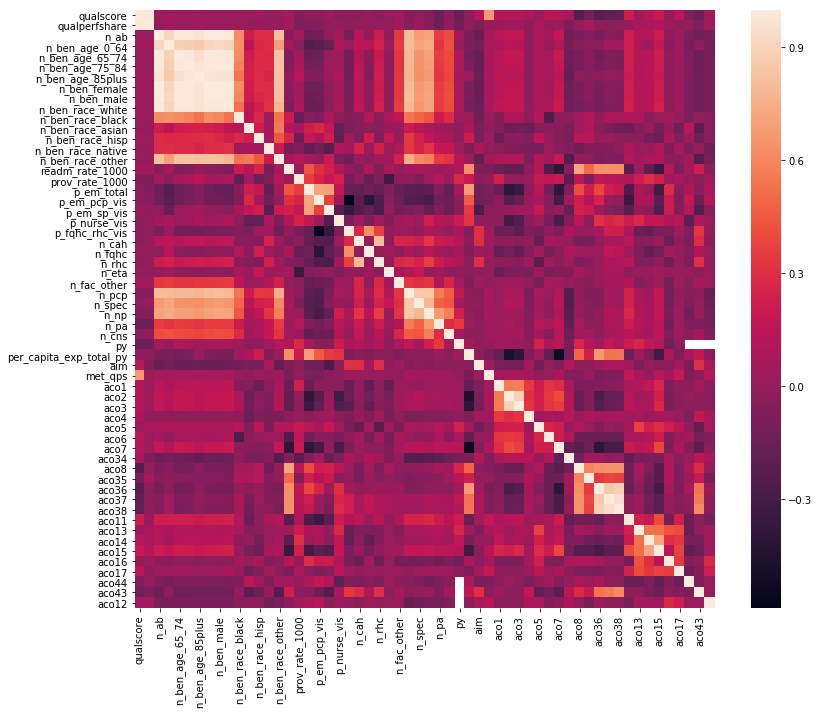

In [205]:
corr = train.corr()
f, ax = plt.subplots(figsize=(13, 11))
sns.heatmap(corr, annot=False, fmt=".2f")

In [206]:
train = train.sort_values(by = ['aco_num'] )

In [207]:
train.head()

,aco_num,aco_name,qualscore,qualperfshare,n_ab,n_ben_age_0_64,n_ben_age_65_74,n_ben_age_75_84,n_ben_age_85plus,n_ben_female,...,aco42,aco40,dm_comp,aco27,aco41,aco28,aco30,aco44,aco43,aco12
1023,A00755,Balance ACO,0.886600,0.5,6051,1293,2091,1615,1052,3749,...,74.5,0,19.83,30.39,25.22,62.61,82.28,NaN,NaN,NaN
1444,A00755,Balance ACO,0.914600,0.5,5742,1213,1964,1503,1062,3550,...,82.31,10.53,30.8,21.52,35.25,61.9,92.23,81.4,1.92,98.35
123,A00755,Balance Accountable Care Network,1.000000,0.5,10459,2356,2757,2038,1115,4872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659,A00755,Balance ACO,78.240000,50.0,8597,2206,2855,2165,1371,5057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,A00755,Balance Accountable Care Network,0.793415,0.5,8165,2255,2621,2025,1264,4829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
train.to_csv("sorted.csv")

In [208]:
train['qualscore'][train['qualscore']>1.0] = train['qualscore']/100
train['qualperfshare'][train['qualperfshare']>1.0] = train['qualperfshare']/100

train.head()

C:\Users\Pratiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pratiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,aco_num,aco_name,qualscore,qualperfshare,n_ab,n_ben_age_0_64,n_ben_age_65_74,n_ben_age_75_84,n_ben_age_85plus,n_ben_female,...,aco42,aco40,dm_comp,aco27,aco41,aco28,aco30,aco44,aco43,aco12
1023,A00755,Balance ACO,0.886600,0.5,6051,1293,2091,1615,1052,3749,...,74.5,0,19.83,30.39,25.22,62.61,82.28,NaN,NaN,NaN
1444,A00755,Balance ACO,0.914600,0.5,5742,1213,1964,1503,1062,3550,...,82.31,10.53,30.8,21.52,35.25,61.9,92.23,81.4,1.92,98.35
123,A00755,Balance Accountable Care Network,1.000000,0.5,10459,2356,2757,2038,1115,4872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659,A00755,Balance ACO,0.782400,0.5,8597,2206,2855,2165,1371,5057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,A00755,Balance Accountable Care Network,0.793415,0.5,8165,2255,2621,2025,1264,4829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
train.replace(to_replace= '-', value = np.nan, inplace=True)

In [210]:
train.head()

,aco_num,aco_name,qualscore,qualperfshare,n_ab,n_ben_age_0_64,n_ben_age_65_74,n_ben_age_75_84,n_ben_age_85plus,n_ben_female,...,aco42,aco40,dm_comp,aco27,aco41,aco28,aco30,aco44,aco43,aco12
1023,A00755,Balance ACO,0.886600,0.5,6051,1293,2091,1615,1052,3749,...,74.50,0.00,19.83,30.39,25.22,62.61,82.28,NaN,NaN,NaN
1444,A00755,Balance ACO,0.914600,0.5,5742,1213,1964,1503,1062,3550,...,82.31,10.53,30.80,21.52,35.25,61.90,92.23,81.4,1.92,98.35
123,A00755,Balance Accountable Care Network,1.000000,0.5,10459,2356,2757,2038,1115,4872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659,A00755,Balance ACO,0.782400,0.5,8597,2206,2855,2165,1371,5057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,A00755,Balance Accountable Care Network,0.793415,0.5,8165,2255,2621,2025,1264,4829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
print(train.groupby(['met_qps']).qualscore.describe())

         count      mean       std     min       25%      50%       75%  \
met_qps                                                                   
0.0        8.0  0.401925  0.124709  0.1736  0.375375  0.40485  0.454500   
1.0      896.0  0.939508  0.054018  0.6820  0.912050  0.94420  0.989525   

            max  
met_qps          
0.0      0.6114  
1.0      1.0000  


In [212]:
train['qualscore'] = train['qualscore'].fillna(method = 'bfill', axis = 0)

In [213]:
##dropping data where per_capita_exp is missing
train = train.dropna(subset =['per_capita_exp_total_py'])
len(train)

1629

In [233]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(train['p_em_total'], train['per_capita_exp_total_py'])

In [234]:
print(corr, p_value)

0.6770518197084769 6.506887206649314e-219


# Data preparation for training

In [217]:
training = train.drop(labels = ['per_capita_exp_total_py', 'aco_num', 'aco_name', 'aco_state'], axis = 1)
target = train['per_capita_exp_total_py']
training.head()

,qualscore,qualperfshare,n_ab,n_ben_age_0_64,n_ben_age_65_74,n_ben_age_75_84,n_ben_age_85plus,n_ben_female,n_ben_male,n_ben_race_white,...,aco42,aco40,dm_comp,aco27,aco41,aco28,aco30,aco44,aco43,aco12
1023,0.886600,0.5,6051,1293,2091,1615,1052,3749,2302,2401,...,74.50,0.00,19.83,30.39,25.22,62.61,82.28,NaN,NaN,NaN
1444,0.914600,0.5,5742,1213,1964,1503,1062,3550,2192,2395,...,82.31,10.53,30.80,21.52,35.25,61.90,92.23,81.4,1.92,98.35
659,0.782400,0.5,8597,2206,2855,2165,1371,5057,3540,3282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,0.793415,0.5,8165,2255,2621,2025,1264,4829,3336,3132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1031,0.927200,0.5,26942,3701,12221,7619,3401,15254,11688,25748,...,78.24,8.47,50.76,14.26,55.86,66.50,93.99,NaN,NaN,NaN


In [218]:
for column in training.columns:
    print(column)
    training[column] = training[column].astype(float)

qualscore
qualperfshare
n_ab
n_ben_age_0_64
n_ben_age_65_74
n_ben_age_75_84
n_ben_age_85plus
n_ben_female
n_ben_male
n_ben_race_white
n_ben_race_black
n_ben_race_asian
n_ben_race_hisp
n_ben_race_native
n_ben_race_other
readm_rate_1000
prov_rate_1000
p_em_total
p_em_pcp_vis
p_em_sp_vis
p_nurse_vis
p_fqhc_rhc_vis
n_cah
n_fqhc
n_rhc
n_eta
n_fac_other
n_pcp
n_spec
n_np
n_pa
n_cns
py
aim
met_qps
aco1
aco2
aco3
aco4
aco5
aco6
aco7
aco34
aco8
aco35
aco36
aco37
aco38
aco11
aco13
aco14
aco15
aco16
aco17
aco18
aco19
aco20
aco42
aco40
dm_comp
aco27
aco41
aco28
aco30
aco44
aco43
aco12


In [343]:
## splitting train and test data 

xtrain, xval, ytrain, yval = train_test_split(training, target, test_size = 0.25, random_state = 10)
xtrain = xtrain.reset_index(drop = True)
xval = xval.reset_index(drop = True)
ytrain = ytrain.reset_index(drop = True)
yval = yval.reset_index(drop = True)


In [344]:
!pip install lightgbm

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [345]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators = 600,
                     booster = 'dart',
    metric= 'rmse',
    num_leaves= 24,
    learning_rate  = 0.05,
    sub_sample = 0.7,
    colsample_bytree = 0.8,
    reg_lambda=0.05,
    reg_alpha = 0.075,
    seed = 100,
    objective= 'regression')

In [346]:
lgb.fit(xtrain, ytrain, eval_set = [(xtrain, ytrain), (xval, yval)], eval_metric = 'rmse', verbose = True )

[1]	training's rmse: 2278.08	valid_1's rmse: 3210.65
[2]	training's rmse: 2201.01	valid_1's rmse: 3140.47
[3]	training's rmse: 2137.57	valid_1's rmse: 3095.15
[4]	training's rmse: 2065.1	valid_1's rmse: 3040.61
[5]	training's rmse: 2009.2	valid_1's rmse: 3002.99
[6]	training's rmse: 1945.18	valid_1's rmse: 2948.88
[7]	training's rmse: 1884.08	valid_1's rmse: 2901.73
[8]	training's rmse: 1827.31	valid_1's rmse: 2855.31
[9]	training's rmse: 1771.35	valid_1's rmse: 2811.43
[10]	training's rmse: 1727.72	valid_1's rmse: 2783.94
[11]	training's rmse: 1680.29	valid_1's rmse: 2744.45
[12]	training's rmse: 1641.2	valid_1's rmse: 2720.72
[13]	training's rmse: 1596.16	valid_1's rmse: 2687.6
[14]	training's rmse: 1561.84	valid_1's rmse: 2672.15
[15]	training's rmse: 1521.72	valid_1's rmse: 2642.55
[16]	training's rmse: 1483.78	valid_1's rmse: 2614.74
[17]	training's rmse: 1448.63	valid_1's rmse: 2589.7
[18]	training's rmse: 1414.53	valid_1's rmse: 2566.49
[19]	training's rmse: 1381.7	valid_1's rms

[194]	training's rmse: 460.856	valid_1's rmse: 2024.64
[195]	training's rmse: 459.418	valid_1's rmse: 2023.74
[196]	training's rmse: 457.907	valid_1's rmse: 2024.1
[197]	training's rmse: 456.691	valid_1's rmse: 2022.82
[198]	training's rmse: 455.29	valid_1's rmse: 2022.04
[199]	training's rmse: 453.932	valid_1's rmse: 2021.99
[200]	training's rmse: 452.637	valid_1's rmse: 2022.5
[201]	training's rmse: 451.387	valid_1's rmse: 2020.98
[202]	training's rmse: 450.189	valid_1's rmse: 2019.88
[203]	training's rmse: 448.874	valid_1's rmse: 2020.09
[204]	training's rmse: 447.34	valid_1's rmse: 2020.63
[205]	training's rmse: 445.997	valid_1's rmse: 2019.46
[206]	training's rmse: 444.71	valid_1's rmse: 2018.79
[207]	training's rmse: 443.359	valid_1's rmse: 2017.56
[208]	training's rmse: 441.952	valid_1's rmse: 2017.53
[209]	training's rmse: 440.462	valid_1's rmse: 2016.03
[210]	training's rmse: 439.061	valid_1's rmse: 2016.55
[211]	training's rmse: 437.793	valid_1's rmse: 2015.36
[212]	training'

[387]	training's rmse: 277.041	valid_1's rmse: 1958.81
[388]	training's rmse: 276.421	valid_1's rmse: 1958.82
[389]	training's rmse: 275.769	valid_1's rmse: 1958.66
[390]	training's rmse: 275.153	valid_1's rmse: 1958
[391]	training's rmse: 274.477	valid_1's rmse: 1957.52
[392]	training's rmse: 273.918	valid_1's rmse: 1956.87
[393]	training's rmse: 273.272	valid_1's rmse: 1957.1
[394]	training's rmse: 272.639	valid_1's rmse: 1956.31
[395]	training's rmse: 271.981	valid_1's rmse: 1956.77
[396]	training's rmse: 271.373	valid_1's rmse: 1957.1
[397]	training's rmse: 270.74	valid_1's rmse: 1956.32
[398]	training's rmse: 269.88	valid_1's rmse: 1956.59
[399]	training's rmse: 269.259	valid_1's rmse: 1956.88
[400]	training's rmse: 268.664	valid_1's rmse: 1956.26
[401]	training's rmse: 267.986	valid_1's rmse: 1955.62
[402]	training's rmse: 267.415	valid_1's rmse: 1955.41
[403]	training's rmse: 266.868	valid_1's rmse: 1955.74
[404]	training's rmse: 266.237	valid_1's rmse: 1954.94
[405]	training's 

[568]	training's rmse: 185.85	valid_1's rmse: 1916.42
[569]	training's rmse: 185.464	valid_1's rmse: 1916.08
[570]	training's rmse: 185.101	valid_1's rmse: 1916.03
[571]	training's rmse: 184.686	valid_1's rmse: 1916.27
[572]	training's rmse: 184.336	valid_1's rmse: 1915.67
[573]	training's rmse: 183.929	valid_1's rmse: 1915.81
[574]	training's rmse: 183.554	valid_1's rmse: 1915.33
[575]	training's rmse: 183.174	valid_1's rmse: 1914.97
[576]	training's rmse: 182.712	valid_1's rmse: 1915.13
[577]	training's rmse: 182.291	valid_1's rmse: 1914.44
[578]	training's rmse: 181.917	valid_1's rmse: 1914.47
[579]	training's rmse: 181.551	valid_1's rmse: 1914.09
[580]	training's rmse: 181.154	valid_1's rmse: 1914.23
[581]	training's rmse: 180.806	valid_1's rmse: 1914.48
[582]	training's rmse: 180.456	valid_1's rmse: 1914.09
[583]	training's rmse: 180.059	valid_1's rmse: 1913.73
[584]	training's rmse: 179.717	valid_1's rmse: 1913.65
[585]	training's rmse: 179.347	valid_1's rmse: 1913.13
[586]	train

LGBMRegressor(booster='dart', boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.8, importance_type='split', learning_rate=0.05,
       max_depth=-1, metric='rmse', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=600,
       n_jobs=-1, num_leaves=24, objective='regression', random_state=None,
       reg_alpha=0.075, reg_lambda=0.05, seed=100, silent=True,
       sub_sample=0.7, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

In [347]:
predicted = lgb.predict(xval)

In [348]:
from sklearn.metrics import r2_score
print(r2_score(yval, predicted))

0.6559388535811803


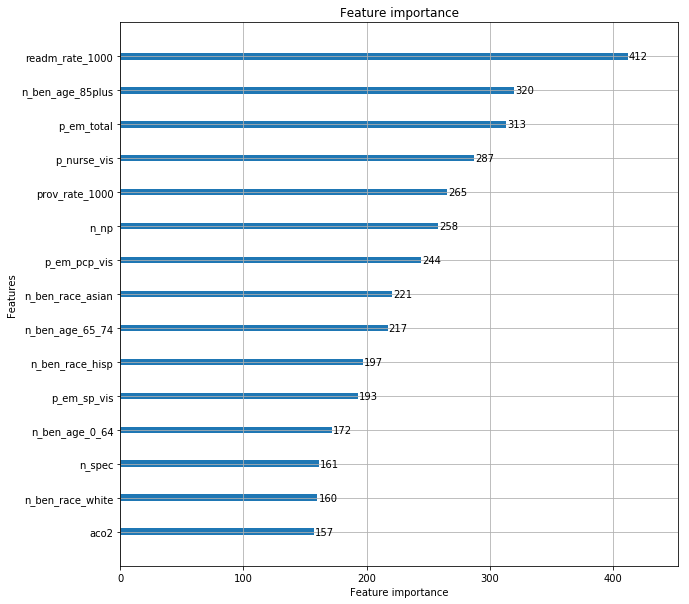

In [299]:
import lightgbm
ax = lightgbm.plot_importance(lgb, max_num_features =15)
fig = ax.figure
fig.set_size_inches(10, 10)

In [316]:
from scipy.stats import pearsonr
best_features = ['p_em_total', 'p_nurse_vis', 'readm_rate_1000', 'p_em_pcp_vis', 'qualscore', 'prov_rate_1000', 'n_np', 'n_ben_race_hisp', 'n_ben_age_65_74']
for i, feature in enumerate (best_features):
    corr, p_value = pearsonr(train[feature], train['per_capita_exp_total_py'])
    print(feature,corr, p_value)

p_em_total 0.6770518197084769 6.506887206649314e-219
p_nurse_vis 0.3212883098133384 1.970406116976492e-40
readm_rate_1000 0.6299123962866168 8.088440884937245e-181
p_em_pcp_vis 0.45645962414607244 1.2306557352032983e-84
qualscore -0.13083064608801429 1.1632574865073798e-07
prov_rate_1000 0.2014232931801186 2.255792355129468e-16
n_np -0.020645018859453218 0.4050138906109777
n_ben_race_hisp nan 1.0
n_ben_age_65_74 -0.11937954055967692 1.3526875696363239e-06


C:\Users\Pratiksha\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [314]:
##making a data to study the positive and negative correlation of features with target
corr = train.corr()
corr.per_capita_exp_total_py.to_csv("correlation.csv")

In [317]:
##training data with just important features  but it reduces the R2_score
training2 = training[['p_em_total', 'p_nurse_vis', 'readm_rate_1000', 'p_em_pcp_vis', 'qualscore', 'prov_rate_1000', 'n_np', 'n_ben_race_hisp', 'n_ben_age_65_74', 'p_em_sp_vis', 'p_em_pcp_vis', 'aco3', 'aco3', 'aco6', 'aco8', 'aco35', 'aco37', 'aco38', 'aco27', 'aco11', 'aco15', 'aco19', 'aco20', 'dm_comp', 'aco41']]
target = train['per_capita_exp_total_py']
training2.head()

,p_em_total,p_nurse_vis,readm_rate_1000,p_em_pcp_vis,qualscore,prov_rate_1000,n_np,n_ben_race_hisp,n_ben_age_65_74,p_em_sp_vis,...,aco35,aco37,aco38,aco27,aco11,aco15,aco19,aco20,dm_comp,aco41
1023,14642.00000,2065.000000,225.000000,7403.000000,0.886600,785.000000,80.0,1263.0,2091.0,5127.000000,...,17.93,92.71,76.50,30.39,88.00,29.30,37.84,51.97,19.83,25.22
1444,14951.00000,2420.000000,212.000000,6934.000000,0.914600,817.000000,211.0,1165.0,1964.0,5546.000000,...,17.69,90.15,74.79,21.52,100.00,33.16,45.02,49.21,30.80,35.25
659,17503.00000,2451.000000,268.000000,9161.000000,0.782400,776.000000,88.0,1760.0,2855.0,5696.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,16500.99548,1936.760078,257.747172,8985.677892,0.793415,772.749631,67.0,1833.0,2621.0,5275.416925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1031,8762.00000,1939.000000,127.000000,3261.000000,0.927200,767.000000,149.0,300.0,12221.0,3519.000000,...,16.69,59.70,48.70,14.26,99.58,78.47,67.99,75.33,50.76,55.86


In [318]:
xtrain, xval, ytrain, yval = train_test_split(training2, target, test_size = 0.25, random_state = 10)
xtrain = xtrain.reset_index(drop = True)
xval = xval.reset_index(drop = True)
ytrain = ytrain.reset_index(drop = True)
yval = yval.reset_index(drop = True)

In [319]:
from lightgbm import LGBMRegressor

lgb1 = LGBMRegressor(n_estimators = 600,
                     booster = 'dart',
    metric= 'rmse',
    num_leaves= 7,
    learning_rate  = 0.05,
    sub_sample = 0.7,
    colsample_bytree = 0.8,
    reg_lambda=0.05,
    reg_alpha = 0.075,
    seed = 100,
    objective= 'regression')

In [320]:
lgb1.fit(xtrain, ytrain, eval_set = [(xtrain, ytrain), (xval, yval)], eval_metric = 'rmse', verbose = True )

[1]	training's rmse: 2276.79	valid_1's rmse: 3201.28
[2]	training's rmse: 2221.45	valid_1's rmse: 3163.54
[3]	training's rmse: 2156.51	valid_1's rmse: 3107.22
[4]	training's rmse: 2095.49	valid_1's rmse: 3056.92
[5]	training's rmse: 2040.81	valid_1's rmse: 3013.63
[6]	training's rmse: 1986.03	valid_1's rmse: 2963.16
[7]	training's rmse: 1943.93	valid_1's rmse: 2937.21
[8]	training's rmse: 1895.86	valid_1's rmse: 2895.01
[9]	training's rmse: 1859.29	valid_1's rmse: 2873.12
[10]	training's rmse: 1816.61	valid_1's rmse: 2831.3
[11]	training's rmse: 1776.51	valid_1's rmse: 2794.88
[12]	training's rmse: 1736.91	valid_1's rmse: 2761.33
[13]	training's rmse: 1700.98	valid_1's rmse: 2730.92
[14]	training's rmse: 1667.18	valid_1's rmse: 2703.66
[15]	training's rmse: 1635.59	valid_1's rmse: 2680.92
[16]	training's rmse: 1607.17	valid_1's rmse: 2657.72
[17]	training's rmse: 1578.45	valid_1's rmse: 2631.67
[18]	training's rmse: 1552.53	valid_1's rmse: 2611.21
[19]	training's rmse: 1527.82	valid_1'

[188]	training's rmse: 892.468	valid_1's rmse: 2043.59
[189]	training's rmse: 891.504	valid_1's rmse: 2042.98
[190]	training's rmse: 890.663	valid_1's rmse: 2042.36
[191]	training's rmse: 889.125	valid_1's rmse: 2043.77
[192]	training's rmse: 887.36	valid_1's rmse: 2043.58
[193]	training's rmse: 886.394	valid_1's rmse: 2043.79
[194]	training's rmse: 885.401	valid_1's rmse: 2043.3
[195]	training's rmse: 884.349	valid_1's rmse: 2042.45
[196]	training's rmse: 883.061	valid_1's rmse: 2042.47
[197]	training's rmse: 881.912	valid_1's rmse: 2040.82
[198]	training's rmse: 881.082	valid_1's rmse: 2039.87
[199]	training's rmse: 880.035	valid_1's rmse: 2039.81
[200]	training's rmse: 877.882	valid_1's rmse: 2039.82
[201]	training's rmse: 876.274	valid_1's rmse: 2039.63
[202]	training's rmse: 875.27	valid_1's rmse: 2038.18
[203]	training's rmse: 873.95	valid_1's rmse: 2035.83
[204]	training's rmse: 872.836	valid_1's rmse: 2035.34
[205]	training's rmse: 871.503	valid_1's rmse: 2035.15
[206]	training

[394]	training's rmse: 708.111	valid_1's rmse: 1995.57
[395]	training's rmse: 707.096	valid_1's rmse: 1995.02
[396]	training's rmse: 706.689	valid_1's rmse: 1994.97
[397]	training's rmse: 705.287	valid_1's rmse: 1995.5
[398]	training's rmse: 704.862	valid_1's rmse: 1995.39
[399]	training's rmse: 704.209	valid_1's rmse: 1995.33
[400]	training's rmse: 703.682	valid_1's rmse: 1995.13
[401]	training's rmse: 702.986	valid_1's rmse: 1995.15
[402]	training's rmse: 702.449	valid_1's rmse: 1996.18
[403]	training's rmse: 701.837	valid_1's rmse: 1995.98
[404]	training's rmse: 701.355	valid_1's rmse: 1995.57
[405]	training's rmse: 700.713	valid_1's rmse: 1996.09
[406]	training's rmse: 700.333	valid_1's rmse: 1995.88
[407]	training's rmse: 699.864	valid_1's rmse: 1995.78
[408]	training's rmse: 699.372	valid_1's rmse: 1995.02
[409]	training's rmse: 699.075	valid_1's rmse: 1994.67
[410]	training's rmse: 698.397	valid_1's rmse: 1994.04
[411]	training's rmse: 697.826	valid_1's rmse: 1993.03
[412]	train

LGBMRegressor(booster='dart', boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.8, importance_type='split', learning_rate=0.05,
       max_depth=-1, metric='rmse', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=600,
       n_jobs=-1, num_leaves=7, objective='regression', random_state=None,
       reg_alpha=0.075, reg_lambda=0.05, seed=100, silent=True,
       sub_sample=0.7, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

In [321]:
predicted = lgb1.predict(xval)

In [322]:
from sklearn.metrics import r2_score
print(r2_score(yval, predicted))

0.6341861294275914


# #Data Engineering

In [325]:
#some features which could be more informative 

train['pat_psp_visit_ratio'] = train['p_em_pcp_vis']/train['p_em_total']
train['pat_sp_visit_ratio']= train['p_em_sp_vis']/train['p_em_total']
train['pat_nurse_vis_ratio'] = train['p_nurse_vis']/train['p_em_total']

train['pat_pcp_sp_vis_ratio'] = train['p_em_pcp_vis']/train['p_em_sp_vis']
train['pat_nurse_sp_vis_ratio'] = train['p_nurse_vis']/train['p_em_sp_vis']
 

In [326]:
train['n_np_spec'] = train['n_np']/train['n_spec']
train['n_pcp_spec'] = train['n_pcp']/train['n_spec']
train['n_np_cns'] = train['n_np']/train['n_cns']

In [328]:
###training data with extra features. It improves R2_score significantly showing that new features are working better
training3 = train.drop(labels = ['per_capita_exp_total_py', 'aco_num', 'aco_name', 'aco_state'], axis = 1)
target = train['per_capita_exp_total_py']
training3.head()

,qualscore,qualperfshare,n_ab,n_ben_age_0_64,n_ben_age_65_74,n_ben_age_75_84,n_ben_age_85plus,n_ben_female,n_ben_male,n_ben_race_white,...,aco43,aco12,pat_psp_visit_ratio,pat_sp_visit_ratio,pat_nurse_vis_ratio,pat_pcp_sp_vis_ratio,pat_nurse_sp_vis_ratio,n_np_spec,n_pcp_spec,n_np_cns
1023,0.886600,0.5,6051,1293,2091,1615,1052,3749,2302,2401,...,NaN,NaN,0.505600,0.350157,0.141033,1.443924,0.402770,0.776699,1.495146,inf
1444,0.914600,0.5,5742,1213,1964,1503,1062,3550,2192,2395,...,1.92,98.35,0.463782,0.370945,0.161862,1.250270,0.436351,1.688000,1.496000,105.500000
659,0.782400,0.5,8597,2206,2855,2165,1371,5057,3540,3282,...,NaN,NaN,0.523396,0.325430,0.140033,1.608322,0.430302,0.155752,0.469027,inf
339,0.793415,0.5,8165,2255,2621,2025,1264,4829,3336,3132,...,NaN,NaN,0.544554,0.319703,0.117372,1.703311,0.367129,0.089333,0.389333,inf
1031,0.927200,0.5,26942,3701,12221,7619,3401,15254,11688,25748,...,NaN,NaN,0.372175,0.401621,0.221297,0.926684,0.551009,0.315011,0.718816,inf


In [330]:
for column in training3.columns:
    print(column)
    training3[column] = training3[column].astype(float)

qualscore
qualperfshare
n_ab
n_ben_age_0_64
n_ben_age_65_74
n_ben_age_75_84
n_ben_age_85plus
n_ben_female
n_ben_male
n_ben_race_white
n_ben_race_black
n_ben_race_asian
n_ben_race_hisp
n_ben_race_native
n_ben_race_other
readm_rate_1000
prov_rate_1000
p_em_total
p_em_pcp_vis
p_em_sp_vis
p_nurse_vis
p_fqhc_rhc_vis
n_cah
n_fqhc
n_rhc
n_eta
n_fac_other
n_pcp
n_spec
n_np
n_pa
n_cns
py
aim
met_qps
aco1
aco2
aco3
aco4
aco5
aco6
aco7
aco34
aco8
aco35
aco36
aco37
aco38
aco11
aco13
aco14
aco15
aco16
aco17
aco18
aco19
aco20
aco42
aco40
dm_comp
aco27
aco41
aco28
aco30
aco44
aco43
aco12
pat_psp_visit_ratio
pat_sp_visit_ratio
pat_nurse_vis_ratio
pat_pcp_sp_vis_ratio
pat_nurse_sp_vis_ratio
n_np_spec
n_pcp_spec
n_np_cns


In [331]:
xtrain, xval, ytrain, yval = train_test_split(training3, target, test_size = 0.25, random_state = 10)
xtrain = xtrain.reset_index(drop = True)
xval = xval.reset_index(drop = True)
ytrain = ytrain.reset_index(drop = True)
yval = yval.reset_index(drop = True)


In [335]:
from lightgbm import LGBMRegressor

lgb3 = LGBMRegressor(n_estimators = 600,
                     booster = 'dart',
    metric= 'rmse',
    num_leaves= 7,
    learning_rate  = 0.05,
    sub_sample = 0.7,
    colsample_bytree = 0.8,
    reg_lambda=0.05,
    reg_alpha = 0.075,
    seed = 100,
    objective= 'regression')

In [336]:
lgb3.fit(xtrain, ytrain, eval_set = [(xtrain, ytrain), (xval, yval)], eval_metric = 'rmse', verbose = True)

[1]	training's rmse: 2291.05	valid_1's rmse: 3216.81
[2]	training's rmse: 2220.79	valid_1's rmse: 3160.66
[3]	training's rmse: 2167.86	valid_1's rmse: 3123.72
[4]	training's rmse: 2107.9	valid_1's rmse: 3074.56
[5]	training's rmse: 2066.91	valid_1's rmse: 3034.52
[6]	training's rmse: 2030.83	valid_1's rmse: 3014.7
[7]	training's rmse: 1976	valid_1's rmse: 2969.08
[8]	training's rmse: 1924.94	valid_1's rmse: 2923.93
[9]	training's rmse: 1877.47	valid_1's rmse: 2877.78
[10]	training's rmse: 1831.03	valid_1's rmse: 2840.49
[11]	training's rmse: 1789.04	valid_1's rmse: 2803.22
[12]	training's rmse: 1748.23	valid_1's rmse: 2764.71
[13]	training's rmse: 1711.24	valid_1's rmse: 2735.42
[14]	training's rmse: 1681.53	valid_1's rmse: 2714.81
[15]	training's rmse: 1648.4	valid_1's rmse: 2684.67
[16]	training's rmse: 1615.59	valid_1's rmse: 2658.04
[17]	training's rmse: 1585.54	valid_1's rmse: 2627.27
[18]	training's rmse: 1556.55	valid_1's rmse: 2605.7
[19]	training's rmse: 1533.52	valid_1's rmse

[226]	training's rmse: 713.115	valid_1's rmse: 1961.93
[227]	training's rmse: 712.281	valid_1's rmse: 1961.18
[228]	training's rmse: 711.3	valid_1's rmse: 1961.49
[229]	training's rmse: 710.361	valid_1's rmse: 1960.64
[230]	training's rmse: 709.383	valid_1's rmse: 1961.37
[231]	training's rmse: 707.661	valid_1's rmse: 1959.49
[232]	training's rmse: 706.631	valid_1's rmse: 1958.74
[233]	training's rmse: 705.401	valid_1's rmse: 1958.26
[234]	training's rmse: 704.112	valid_1's rmse: 1957.29
[235]	training's rmse: 702.904	valid_1's rmse: 1956.36
[236]	training's rmse: 701.78	valid_1's rmse: 1955.36
[237]	training's rmse: 700.706	valid_1's rmse: 1955.67
[238]	training's rmse: 698.889	valid_1's rmse: 1953.82
[239]	training's rmse: 697.781	valid_1's rmse: 1952.74
[240]	training's rmse: 696.815	valid_1's rmse: 1951.84
[241]	training's rmse: 695.32	valid_1's rmse: 1951.38
[242]	training's rmse: 694.063	valid_1's rmse: 1951.85
[243]	training's rmse: 693.276	valid_1's rmse: 1952.49
[244]	training

[471]	training's rmse: 482.996	valid_1's rmse: 1849.83
[472]	training's rmse: 482.261	valid_1's rmse: 1849.78
[473]	training's rmse: 481.748	valid_1's rmse: 1850.05
[474]	training's rmse: 481.009	valid_1's rmse: 1849.83
[475]	training's rmse: 480.379	valid_1's rmse: 1850.11
[476]	training's rmse: 479.71	valid_1's rmse: 1850.49
[477]	training's rmse: 479.193	valid_1's rmse: 1850.04
[478]	training's rmse: 478.73	valid_1's rmse: 1850.13
[479]	training's rmse: 478.068	valid_1's rmse: 1849.92
[480]	training's rmse: 477.234	valid_1's rmse: 1849.86
[481]	training's rmse: 476.261	valid_1's rmse: 1849.63
[482]	training's rmse: 475.615	valid_1's rmse: 1849.74
[483]	training's rmse: 474.824	valid_1's rmse: 1849.46
[484]	training's rmse: 474.128	valid_1's rmse: 1849.44
[485]	training's rmse: 473.598	valid_1's rmse: 1849.38
[486]	training's rmse: 473.123	valid_1's rmse: 1849.29
[487]	training's rmse: 472.447	valid_1's rmse: 1849.26
[488]	training's rmse: 471.896	valid_1's rmse: 1849.41
[489]	traini

LGBMRegressor(booster='dart', boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.8, importance_type='split', learning_rate=0.05,
       max_depth=-1, metric='rmse', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=600,
       n_jobs=-1, num_leaves=7, objective='regression', random_state=None,
       reg_alpha=0.075, reg_lambda=0.05, seed=100, silent=True,
       sub_sample=0.7, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

In [337]:
predicted = lgb3.predict(xval)
print(r2_score(yval, predicted))

0.6839149353243723


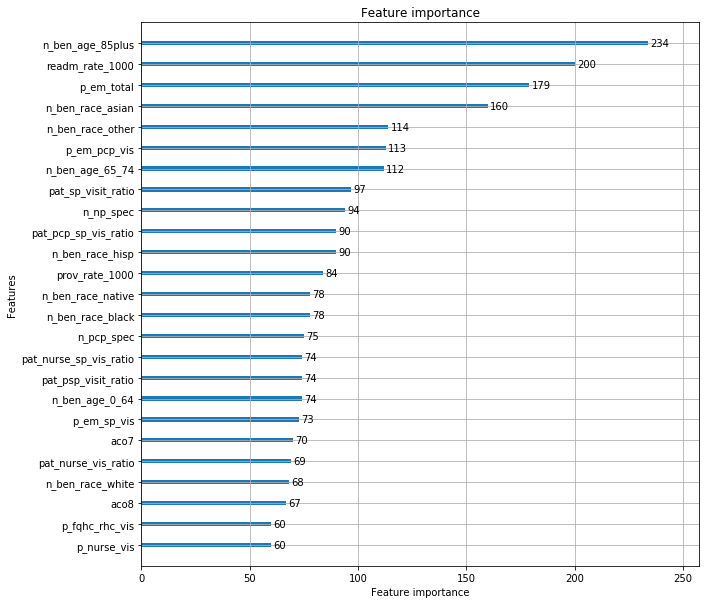

In [338]:
ax = lightgbm.plot_importance(lgb3, max_num_features =25)
fig = ax.figure
fig.set_size_inches(10, 10)